<a href="https://colab.research.google.com/github/jpdeleon/chronos/blob/master/notebooks/examples-cluster_catalogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#!pip install git+https://github.com/jpdeleon/chronos.git@master

In [2]:
import chronos as cr

Created TAP+ (v1.2.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
Created TAP+ (v1.2.1) - Connection:
	Host: geadata.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443


## Hao+2022

In [3]:
#initialize
cc = cr.ClusterCatalog(catalog_name='Hao2022')
cc

ClusterCatalog(catalog_name=Hao2022)

In [4]:
#info
cc.get_vizier_url()

'https://vizier.u-strasbg.fr/viz-bin/VizieR?-source=J/A+A/660/A4'

In [5]:
df = cc.query_catalog()
df.head()

Using Hao2022 catalog.


,Cluster,RA_ICRS,e_RA_ICRS,DE_ICRS,e_DE_ICRS,GLON,e_GLON,GLAT,e_GLAT,adeg,...,e_age,AG,Z,RV,s_RV,N,o_RV,ra,dec,distance
0,OC-0001,267.981796,0.027433,-27.851308,0.019313,1.644622,0.021793,-0.629447,0.022055,0.031006,...,0.17,3.22,0.028,NaN,NaN,17,0,267.981792,-27.851309,2882.425850
1,OC-0002,263.377750,0.068219,-25.019992,0.045327,1.887284,0.050364,4.365118,0.057918,0.076753,...,0.18,3.72,0.028,-12.260829,NaN,33,1,263.377744,-25.019991,1223.322397
2,OC-0003,270.241890,0.034381,-24.870192,0.034047,5.239749,0.037631,-0.881702,0.026765,0.046179,...,0.20,2.56,0.028,NaN,NaN,16,0,270.241885,-24.870191,1830.351995
3,OC-0004,270.678504,0.024258,-24.261303,0.027998,5.965418,0.023713,-0.925977,0.026662,0.035681,...,0.15,1.38,0.016,NaN,NaN,17,0,270.678495,-24.261295,1319.139393
4,OC-0005,271.798880,0.031469,-24.728354,0.034868,6.057161,0.038092,-2.043646,0.024160,0.045108,...,0.19,3.46,0.028,3.358612,NaN,20,1,271.798877,-24.728351,1810.174265


In [6]:
df.columns

Index(['Cluster', 'RA_ICRS', 'e_RA_ICRS', 'DE_ICRS', 'e_DE_ICRS', 'GLON',
       'e_GLON', 'GLAT', 'e_GLAT', 'adeg', 'parallax', 'e_parallax', 'pmra',
       'e_pmra', 'pmdec', 'e_pmdec', 'log10_age', 'e_age', 'AG', 'Z', 'RV',
       's_RV', 'N', 'o_RV', 'ra', 'dec', 'distance'],
      dtype='object')

In [7]:
cc.all_clusters.sort_values(by='log10_age')[['Cluster','log10_age','distance']].head(10)

,Cluster,log10_age,distance
148,OC-0149,6.0,1787.265377
30,OC-0031,6.0,2046.240953
439,OC-0440,6.0,14296.947602
687,OC-0688,6.0,1805.210560
681,OC-0682,6.0,5889.385560
222,OC-0223,6.0,720.292958
50,OC-0051,6.0,1944.927435
291,OC-0292,6.0,1729.451522
62,OC-0063,6.0,3131.850924
63,OC-0064,6.0,1852.023335


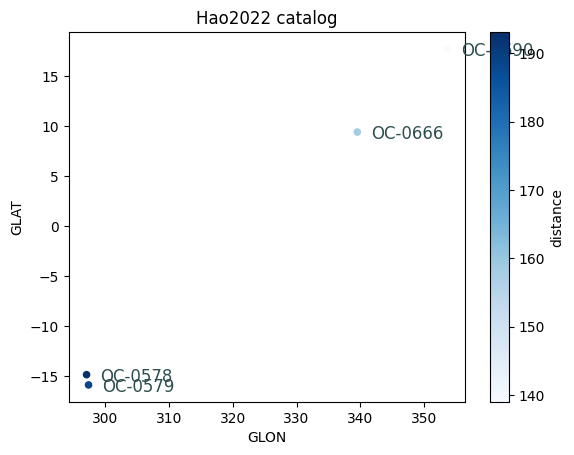

In [8]:
#plot clusters in catalog
cc.all_clusters = cc.all_clusters[cc.all_clusters['distance']<200]
fig = cc.plot_all_clusters(x='GLON', y='GLAT', c='distance');

In [9]:
mem=cc.query_catalog(return_members=True)

Using Hao2022 catalog.


In [10]:
g=mem.groupby(by='Cluster')
g.count().sort_values(by='radial_velocity', ascending=False)

,source_id,RA_ICRS,DE_ICRS,GLON,GLAT,parallax,pmra,pmdec,radial_velocity,e_radial_velocity,Gmag,BP-RP,ra,dec,distance
Cluster,,,,,,,,,,,,,,,
OC-0066,31,31,31,31,31,31,31,31,8,8,31,31,31,31,31
OC-0067,25,25,25,25,25,25,25,25,8,8,25,25,25,25,25
OC-0150,124,124,124,124,124,124,124,124,7,7,124,124,124,124,124
OC-0347,217,217,217,217,217,217,217,217,7,7,217,211,217,217,217
OC-0011,289,289,289,289,289,289,289,289,6,6,289,287,289,289,289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
OC-0257,15,15,15,15,15,15,15,15,0,0,15,15,15,15,15
OC-0256,19,19,19,19,19,19,19,19,0,0,19,19,19,19,19
OC-0255,15,15,15,15,15,15,15,15,0,0,15,15,15,15,15


## He+2022b

In [11]:
import chronos as cr

In [12]:
#initialize
cc = cr.ClusterCatalog(catalog_name='He2022b')
cc

ClusterCatalog(catalog_name=He2022b)

In [13]:
df = cc.query_catalog()
df.head()

Using He2022b catalog.


,Cluster,GLON,e_GLON,GLAT,e_GLAT,Num,parallax,e_plx,pmra,e_pmra,pmdec,e_pmdec,log10_age,A0,ra,dec,distance
0,Alessi_1,123.2631,0.118,-13.3595,0.100,46,1.411,0.036,6.476,0.105,-6.420,0.155,8.70,0.60,13.3557,49.5110,708.717222
1,Alessi_10,31.6259,0.272,-21.0414,0.169,81,2.260,0.046,1.447,0.173,-7.898,0.214,7.90,0.60,301.2290,-10.5241,442.477876
2,Alessi_12,67.4483,0.400,-11.4755,0.357,198,1.837,0.047,4.315,0.193,-4.701,0.155,7.90,0.35,310.9106,23.7975,544.365814
3,Alessi_13,237.2373,2.393,-55.7144,1.100,66,9.535,0.299,36.141,1.600,-4.606,0.985,7.50,0.05,52.0532,-35.6693,104.876770
4,Alessi_19,40.0609,0.278,12.6327,0.177,43,1.691,0.039,-1.000,0.134,-7.180,0.144,7.25,0.30,274.6656,11.9759,591.366056


In [14]:
mem=cc.query_catalog(return_members=True)

Using He2022b catalog.


In [15]:
mem.columns

Index(['source_id', 'GLON', 'GLAT', 'parallax', 'e_parallax', 'pmra', 'e_pmra',
       'pmdec', 'e_pmdec', 'RUWE', 'Gmag', 'BP-RP', 'nre', 'Cluster', 'ra',
       'dec', 'distance'],
      dtype='object')

## He+2022a

In [16]:
#initialize
cc = cr.ClusterCatalog(catalog_name='He2022a')
cc

ClusterCatalog(catalog_name=He2022a)

In [17]:
df = cc.query_catalog()
df.head()

Using He2022a catalog.


,Cluster,GLON,s_GLON,GLAT,s_GLAT,parallax,e_parallax,pmra,e_pmra,pmdec,...,AG,log10_age,Z,N70,minProb,NminProb,Class,ra,dec,distance
0,1,346.147,0.06,-2.132,0.06,0.60,0.06,-0.03,0.12,-3.58,...,2.60,8.3,0.008,115,0.70,115,1,259.2575,-41.6921,1666.666667
1,2,283.662,0.61,-11.431,0.22,1.39,0.04,-9.45,0.14,5.90,...,0.45,7.7,0.036,24,1.00,24,1,140.0578,-66.0403,719.424460
2,3,131.435,0.20,3.074,0.19,1.28,0.03,-2.42,0.09,-1.06,...,1.45,7.6,0.006,48,0.96,48,1,32.9997,64.6075,781.250000
3,4,348.551,0.05,-0.988,0.06,0.60,0.04,0.99,0.12,-1.14,...,2.60,8.4,0.030,55,0.73,55,1,259.8456,-39.0686,1666.666667
4,5,176.325,0.24,-10.221,0.17,2.27,0.12,1.27,0.17,-5.95,...,1.20,6.8,0.022,26,0.40,30,1,74.5512,26.1923,440.528634


In [18]:
mem=cc.query_catalog(return_members=True)

Using He2022a catalog.


In [19]:
mem.columns

Index(['Seq', 'source_id', 'GLON', 'GLAT', 'parallax', 'e_parallax', 'pmra',
       'e_pmra', 'pmdec', 'e_pmdec', 'Gmag', 'BP-RP', 'radial_velocity',
       'e_radial_velocity', 'Pcl', 'Cluster', 'ra', 'dec', 'distance'],
      dtype='object')

In [20]:
g=mem.groupby(by='Cluster')
g.count().sort_values(by='radial_velocity', ascending=False)

,Seq,source_id,GLON,GLAT,parallax,e_parallax,pmra,e_pmra,pmdec,e_pmdec,Gmag,BP-RP,radial_velocity,e_radial_velocity,Pcl,ra,dec,distance
Cluster,,,,,,,,,,,,,,,,,,
347,360,360,360,360,360,360,360,360,360,360,360,346,28,28,360,360,360,360
343,1182,1182,1182,1182,1182,1182,1182,1182,1182,1182,1182,1172,27,27,1182,1182,1182,1182
499,2422,2422,2422,2422,2422,2422,2422,2422,2422,2422,2422,2393,21,21,2422,2422,2422,2422
286,991,991,991,991,991,991,991,991,991,991,991,973,19,19,991,991,991,991
160,921,921,921,921,921,921,921,921,921,921,921,916,17,17,921,921,921,921
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,122,122,122,122,122,122,122,122,122,122,122,118,0,0,122,122,122,122
165,73,73,73,73,73,73,73,73,73,73,73,72,0,0,73,73,73,73
164,35,35,35,35,35,35,35,35,35,35,35,35,0,0,35,35,35,35


Using He2022a catalog.


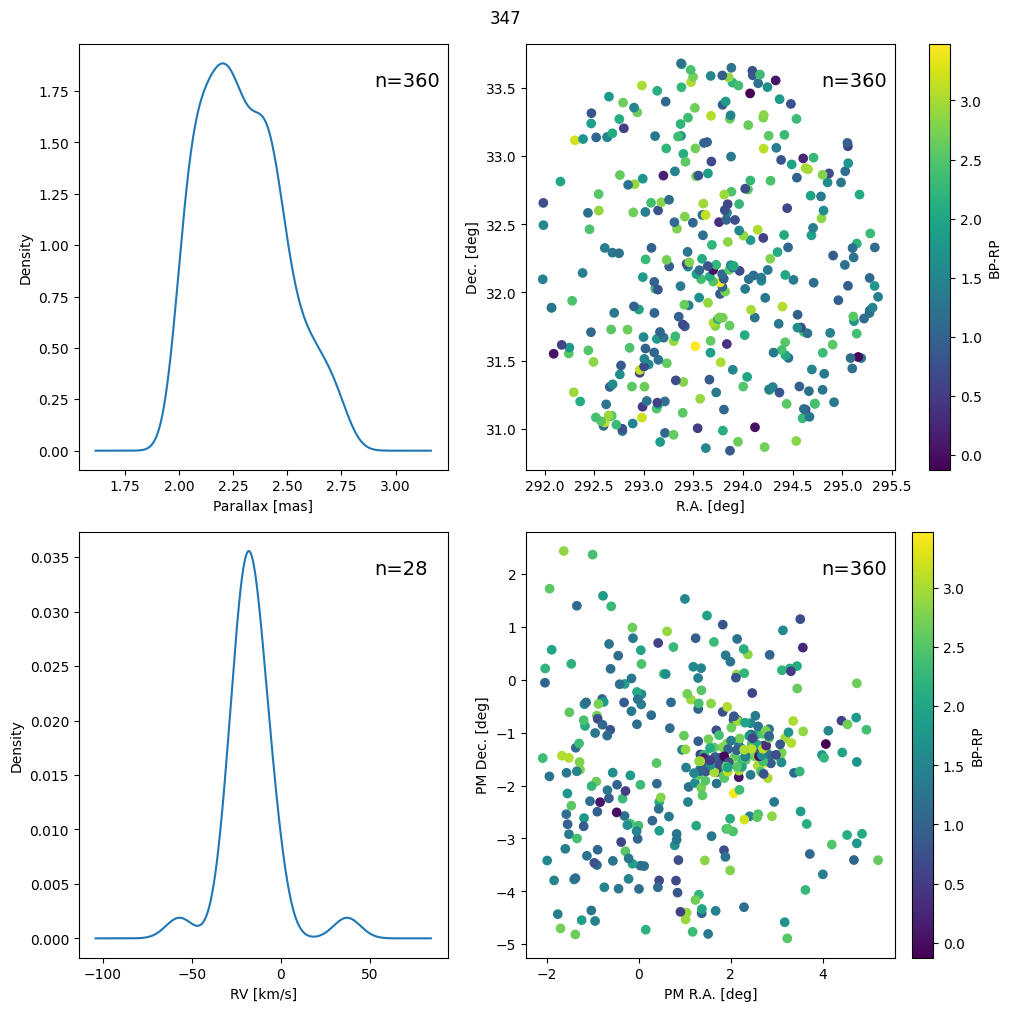

In [21]:
c=cr.Cluster(cluster_name="347", catalog_name="He2022a")
fig=c.plot_rdp_pmrv(color='BP-RP')

## Castro-Ginard+2022

In [50]:
cc = cr.ClusterCatalog(catalog_name="CastroGinard2022")
cc.get_vizier_url()

'https://vizier.u-strasbg.fr/viz-bin/VizieR?-source=J/A+A/661/A118'

In [51]:
df = cc.query_catalog()
df.head()

Using CastroGinard2022 catalog.


,Seq,Cluster,raJ2015,e_raJ2015,decJ2015,e_decJ2015,GLON,s_GLON,GLAT,s_GLAT,...,e_radial_velocity,Nmemb,NmembRV,Flag,logAge,Dist,AV,ra,dec,distance
0,0,UBC1001,267.36,0.10,-29.23,0.04,0.18,0.05,-0.86,0.08,...,NaN,29,0,a,7.464,2786.0,1.914,267.36,-29.23,2702.702703
1,1,UBC1002,268.11,0.05,-28.20,0.07,1.40,0.06,-0.90,0.05,...,NaN,71,1,NaN,8.339,3233.0,2.314,268.11,-28.20,3571.428571
2,2,UBC1003,268.60,0.05,-24.89,0.05,4.48,0.05,0.40,0.05,...,NaN,44,0,NaN,7.782,2809.0,2.659,268.60,-24.89,2564.102564
3,3,UBC1004,270.56,0.07,-25.07,0.06,5.21,0.07,-1.23,0.06,...,2.12,418,2,NaN,8.497,2436.0,2.318,270.56,-25.07,2631.578947
4,4,UBC1005,272.18,0.06,-21.42,0.08,9.12,0.08,-0.75,0.06,...,NaN,31,0,a,7.371,1542.0,1.230,272.18,-21.42,1515.151515


In [52]:
mem = cc.query_catalog(return_members=True)
mem.head()

Using CastroGinard2022 catalog.


,Seq,Cluster,source_id,raJ2015,decJ2015,GLON,GLAT,parallax,pmra,pmdec,RV,Gmag,BP-RP,ra,dec
0,0,UBC1001,4057224024226708992,267.525044,-29.364191,0.139327,-1.058598,0.367668,0.429,-1.939,NaN,14.143807,1.114144,267.525042,-29.364182
1,1,UBC1001,4057230174598255232,267.567029,-29.305336,0.208635,-1.059843,0.363644,0.453,-1.929,NaN,16.556490,1.466582,267.567027,-29.305328
2,2,UBC1001,4057237115289677184,267.488406,-29.267053,0.206327,-0.981341,0.382895,0.479,-1.878,NaN,16.589193,1.633885,267.488404,-29.267045
3,3,UBC1001,4057239344344064256,267.284129,-29.270346,0.111911,-0.830168,0.353141,0.405,-1.848,NaN,13.447580,0.924681,267.284127,-29.270338
4,4,UBC1001,4057239657910636672,267.275512,-29.228923,0.143560,-0.802402,0.352058,0.308,-1.801,NaN,13.205015,0.924160,267.275510,-29.228915


In [53]:
df.shape, mem.shape

((628, 27), (25466, 15))

## Castro-Ginard+2020

In [ ]:
cc = cr.ClusterCatalog(catalog_name="CastroGinard2020")
cc.get_vizier_url()

In [ ]:
df = cc.query_catalog()
df.head()

In [ ]:
mem = cc.query_catalog(return_members=True)
mem.head()

In [ ]:
df.shape, mem.shape

## Castro-Ginard+2019

In [ ]:
cc = cr.ClusterCatalog(catalog_name="CastroGinard2019")
cc.get_vizier_url()

In [ ]:
df = cc.query_catalog()
df.head()

In [ ]:
mem = cc.query_catalog(return_members=True)
mem.head()

In [ ]:
df.shape, mem.shape

## Cantat-Gaudin+2020

In [22]:
#initialize
cc = cr.ClusterCatalog(catalog_name='CantatGaudin2020')
cc

ClusterCatalog(catalog_name=CantatGaudin2020)

In [23]:
#info
cc.get_vizier_url()

'https://vizier.u-strasbg.fr/viz-bin/VizieR?-source=J/A+A/633/A99'

In [24]:
df = cc.query_catalog()
df.head()

Using CantatGaudin2020 catalog.


,Cluster,raJ2015,decJ2015,GLON,GLAT,r50,Nstars,pmra,pmdec,parallax,distance,X,Y,Z,Rgc,ra,dec
0,ASCC_10,51.870,34.981,155.723,-17.770,0.558,71,-1.737,-1.368,1.459,672.0,-583.3,263.1,-205.1,8927.2,51.870,34.981
1,ASCC_101,288.399,36.369,68.028,11.608,0.372,75,0.934,1.288,2.488,397.3,145.6,360.9,79.9,8202.3,288.399,36.369
2,ASCC_105,295.548,27.366,62.825,2.063,0.648,127,1.464,-1.635,1.783,551.8,251.8,490.5,19.9,8103.0,295.548,27.366
3,ASCC_107,297.164,21.987,58.904,-1.901,0.174,59,-0.155,-5.156,1.109,878.5,453.5,751.9,-29.2,7922.3,297.164,21.987
4,ASCC_108,298.306,39.349,74.378,6.074,0.537,230,-0.519,-1.690,0.838,1154.0,309.0,1105.1,122.1,8106.7,298.306,39.349


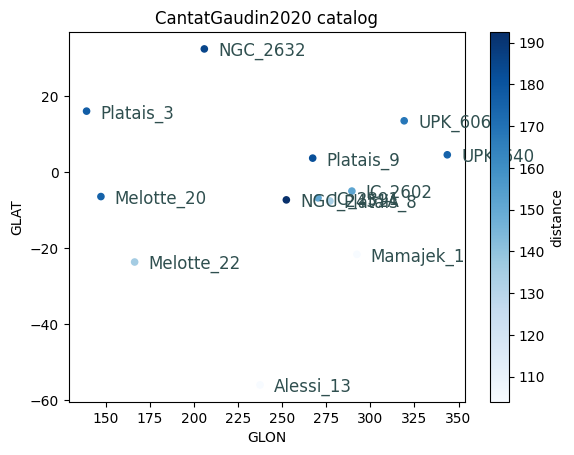

In [25]:
#plot clusters in catalog
cc.all_clusters = cc.all_clusters[cc.all_clusters['distance']<200]
fig = cc.plot_all_clusters(x='GLON', y='GLAT', c='distance');

In [26]:
mem = cc.query_catalog(return_members=True)
mem.head()

Using CantatGaudin2020 catalog.


,raJ2015,decJ2015,source_id,parallax,pmra,pmdec,radial_velocity,phot_g_mean_mag,bp_rp,Proba,Cluster,ra,dec
0,52.756558,34.689531,221090730122510976,1.3799,-1.601,-1.205,NaN,13.0581,0.9138,0.8,ASCC_10,52.756566,34.689536
1,52.730263,34.341461,221065132117493376,1.6550,-2.455,-1.998,NaN,14.7757,1.2807,0.6,ASCC_10,52.730275,34.341469
2,52.684345,34.003600,220988819138630016,1.5876,-2.437,-0.949,NaN,10.8832,0.7241,0.1,ASCC_10,52.684358,34.003604
3,52.676106,34.733687,221094367958697088,1.5586,-1.532,-1.558,NaN,16.8798,1.8380,0.7,ASCC_10,52.676114,34.733694
4,52.712100,34.578004,221083888238423552,1.4173,-1.403,-1.242,NaN,17.9800,2.2854,0.6,ASCC_10,52.712107,34.578009


In [27]:
mem=cc.query_catalog(return_members=True)

Using CantatGaudin2020 catalog.


In [28]:
g=mem.groupby(by='Cluster')
g.count().sort_values(by='radial_velocity', ascending=False)

,raJ2015,decJ2015,source_id,parallax,pmra,pmdec,radial_velocity,phot_g_mean_mag,bp_rp,Proba,ra,dec
Cluster,,,,,,,,,,,,
NGC_3532,1981,1981,1981,1981,1981,1981,237,1981,1944,1981,1981,1981
Melotte_22,1061,1061,1061,1061,1061,1061,230,1061,1046,1061,1061,1061
NGC_2632,719,719,719,719,719,719,194,719,715,719,719,719
Stock_2,1209,1209,1209,1209,1209,1209,194,1209,1199,1209,1209,1209
NGC_6475,1555,1555,1555,1555,1555,1555,168,1555,1477,1555,1555,1555
...,...,...,...,...,...,...,...,...,...,...,...,...
UBC_27,65,65,65,65,65,65,0,65,65,65,65,65
Pfleiderer_3,73,73,73,73,73,73,0,73,72,73,73,73
FSR_0985,101,101,101,101,101,101,0,101,101,101,101,101


## Cantat-Gaudin+2018

In [29]:
cc = cr.ClusterCatalog(catalog_name="CantatGaudin2018")
cc.get_vizier_url()

'https://vizier.u-strasbg.fr/viz-bin/VizieR?-source=J/A+A/618/A93'

In [30]:
df = cc.query_catalog()
df.head()

Using CantatGaudin2018 catalog.


,Cluster,ra,dec,GLON,GLAT,r50,Nstars,pmra,pmdec,parallax,distance,X,Y,Z,Rgc
0,ASCC_10,51.870,34.981,155.723,-17.770,0.558,71,-1.737,-1.368,1.459,672.0,-583.3,263.1,-205.1,8927.2
1,ASCC_101,288.399,36.369,68.028,11.608,0.372,75,0.934,1.288,2.488,397.3,145.6,360.9,79.9,8202.3
2,ASCC_105,295.548,27.366,62.825,2.063,0.648,127,1.464,-1.635,1.783,551.8,251.8,490.5,19.9,8103.0
3,ASCC_107,297.164,21.987,58.904,-1.901,0.174,59,-0.155,-5.156,1.109,878.5,453.5,751.9,-29.2,7922.3
4,ASCC_108,298.306,39.349,74.378,6.074,0.537,230,-0.519,-1.690,0.838,1154.0,309.0,1105.1,122.1,8106.7


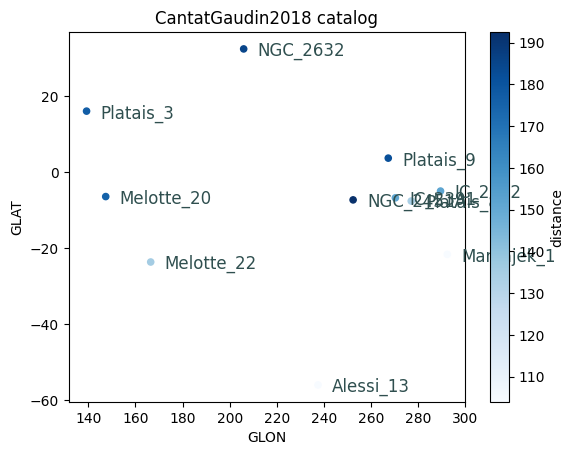

In [31]:
#plot clusters in catalog
cc.all_clusters = cc.all_clusters[cc.all_clusters['distance']<200]
fig = cc.plot_all_clusters(x='GLON', y='GLAT', c='distance');

In [32]:
mem = cc.query_catalog(return_members=True)
mem.head()

Using CantatGaudin2018 catalog.


,raJ2015,decJ2015,source_id,GLON,GLAT,parallax,pmra,pmdec,phot_g_n_obs,Gmag,bp_rp,PMemb,Cluster,ra,dec
0,301.229391,-11.186849,4190669036038417152,30.982256,-21.322445,2.1358,1.268,-8.560,348,14.804825,1.412944,0.7,Alessi_10,301.229385,-11.186812
1,301.014346,-11.419202,4190657903483144960,30.660791,-21.229051,2.2071,1.136,-8.043,331,17.350530,2.605459,1.0,Alessi_10,301.014341,-11.419167
2,300.801432,-11.195500,4190723255705770240,30.783967,-20.945461,2.0438,1.259,-8.064,329,12.473157,0.865277,0.8,Alessi_10,300.801426,-11.195466
3,301.006976,-11.037219,4190732120518267776,31.028893,-21.061430,2.3256,1.189,-8.100,301,16.400896,1.935030,1.0,Alessi_10,301.006971,-11.037184
4,301.678011,-10.865093,4190774206899418880,31.495512,-21.585570,2.2585,1.598,-7.630,322,17.435835,2.370981,1.0,Alessi_10,301.678004,-10.865060


In [33]:
df.shape, mem.shape

((1229, 15), (401448, 15))

## Bossini+2019

In [34]:
cc = cr.ClusterCatalog(catalog_name="Bossini2019")
cc.get_vizier_url()

'https://vizier.u-strasbg.fr/viz-bin/VizieR?-source=J/A+A/623/A108/tablea'

In [35]:
df = cc.query_catalog()
df.head()

Using Bossini2019 catalog.


,Cluster,ra,dec,log10_age,e_logA,E_logA,dist_mod,dist_mod_e1,dist_mod_e2,AV,e_AV,E_AV,AGTO,e_AGTO,E_AGTO,Fe_H,r_Fe_H,distance
0,Blanco_1,0.853,-29.958,7.975,7.998,7.943,6.876,6.876,6.876,0.031,0.031,0.031,0.030,0.030,0.030,0.00,HRS,237.246602
1,IC_2391,130.292,-52.991,7.561,7.583,7.540,5.908,5.908,5.908,0.093,0.093,0.093,0.091,0.091,0.091,0.00,HRS,151.914770
2,IC_2602,160.613,-64.426,7.547,7.563,7.533,5.914,5.914,5.914,0.096,0.096,0.096,0.094,0.094,0.094,0.00,HRS,152.335106
3,IC_2714,169.373,-62.719,8.550,8.550,8.550,10.711,10.720,10.704,0.991,1.000,0.984,0.967,0.976,0.960,0.02,HRS,1387.394601
4,IC_4665,266.554,5.615,7.581,7.636,7.550,7.450,7.495,7.395,0.397,0.430,0.364,0.388,0.420,0.355,-0.03,HRS,309.029543


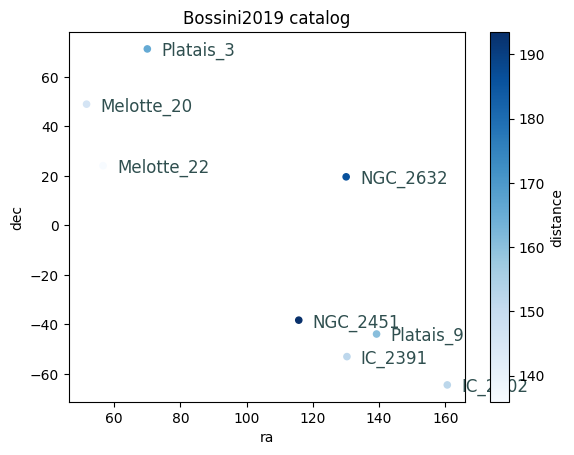

In [36]:
#plot clusters in catalog
cc.all_clusters = cc.all_clusters[cc.all_clusters['distance']<200]
fig = cc.plot_all_clusters(x='ra', y='dec', c='distance');

In [ ]:
ax = c.plot_hrd(log_age=8)

## Babusiaux+2018

In [40]:
cc = cr.ClusterCatalog(catalog_name="Babusiaux2018")
cc.get_vizier_url()

'https://vizier.u-strasbg.fr/viz-bin/VizieR?-source=J/A+A/616/A10'

In [41]:
df = cc.query_catalog()
df.head()

Using Babusiaux2018 catalog.


,Nstars,Cluster,raJ2015,decJ2015,U,e_U,V,e_V,W,e_W,...,RV,e_RV,ra,dec,cc1,cc2,cc3,rMax,RV_n_obs,distance
0,740,alphaPer,52.06,49.06,-5.110,0.053,24.183,0.067,-14.122,0.097,...,-0.29,0.08,52.0598,49.0601,NaN,NaN,NaN,NaN,NaN,174.886324
1,489,Blanco1,0.72,-30.09,6.176,0.111,21.150,0.020,-0.296,0.065,...,5.78,0.10,0.7199,-30.0900,NaN,NaN,NaN,NaN,NaN,237.191651
2,153,ComaBer,185.98,26.09,-1.638,0.078,4.785,0.018,-3.528,0.040,...,-0.52,0.07,185.9801,26.0900,NaN,NaN,NaN,NaN,NaN,85.910653
3,515,Hyades,67.98,17.01,-6.059,0.031,45.691,0.069,5.544,0.025,...,39.96,0.06,67.9795,17.0101,NaN,NaN,NaN,NaN,NaN,47.501425
4,325,IC2391,130.29,-52.99,-0.751,0.054,28.459,0.062,-1.590,0.105,...,14.59,0.09,130.2902,-52.9901,NaN,NaN,NaN,NaN,NaN,151.584053


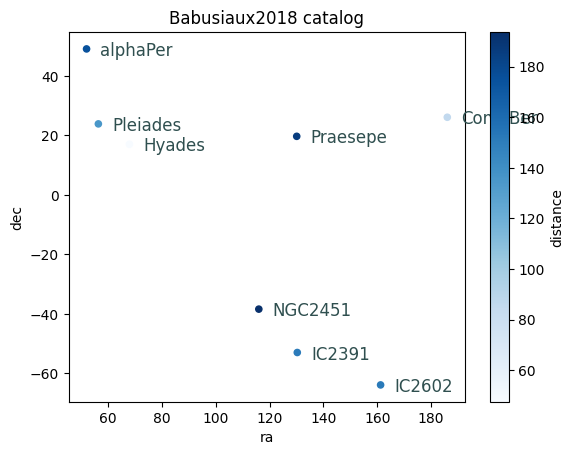

In [42]:
#plot clusters in catalog
cc.all_clusters = cc.all_clusters[cc.all_clusters['distance']<200]
fig = cc.plot_all_clusters(x='ra', y='dec', c='distance');

In [43]:
mem = cc.query_catalog(return_members=True)
mem.head()

Using Babusiaux2018 catalog.


,source_id,Cluster,raJ2015,decJ2015,Gmag,parallax,e_plx,ra,dec
0,49520255665123328,Hyades,64.87461,21.75372,12.861,20.866,0.033,64.87410,21.75388
1,49729231594420096,Hyades,60.20378,18.19388,5.790,21.789,0.045,60.20319,18.19400
2,51383893515451392,Hyades,59.80696,20.42805,12.570,22.737,0.006,59.80634,20.42821
3,145373377272257664,Hyades,66.06127,21.73605,6.990,23.109,0.003,66.06072,21.73625
4,145391484855481344,Hyades,67.00371,21.61972,5.643,19.968,0.067,67.00326,21.61990


In [44]:
df.shape, mem.shape

((46, 32), (40903, 9))

## Bouma+2019

In [45]:
cc = cr.ClusterCatalog(catalog_name="Bouma2019")
cc.get_vizier_url()

'https://vizier.u-strasbg.fr/viz-bin/VizieR?-source=J/ApJS/245/13'

In [46]:
df = cc.query_catalog()
df.head()

Using Bouma2019 catalog.
Some parallaxes are negative in Bouma2019!
These are removed for the meantime.
For proper treatment, see:
https://arxiv.org/pdf/1804.09366.pdf



,Cluster,dec,distance,k13_e_logt,k13_logt,parallax,phot_bp_mean_mag,phot_g_mean_mag,phot_rp_mean_mag,pmdec,pmra,ra,count
0,118TAU,23.569544,106.242354,NaN,NaN,9.412442,13.518909,12.354570,11.282246,-28.354268,7.761713,82.427007,1
1,ABDMG,31.705265,45.836645,NaN,NaN,21.816606,14.296335,13.025639,11.763298,-100.307957,64.861784,56.561986,97
2,AH03_J0822-36.4,-36.407564,1858.138397,NaN,8.915,0.538181,16.184860,15.705580,15.055792,3.345756,-3.555434,125.517644,119
3,AH03_J1725-34.4,-34.411341,1714.096934,NaN,NaN,0.583398,15.837820,14.560573,13.435419,-2.348778,-1.038870,261.376282,3
4,AH03_J2011+26.7,26.725594,2147.299714,NaN,NaN,0.465701,16.392403,15.595353,14.680267,-3.585821,-2.188606,302.997192,11


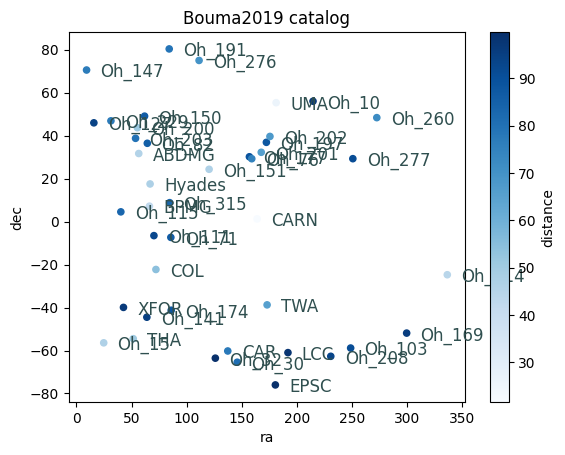

In [47]:
#plot clusters in catalog
cc.all_clusters = cc.all_clusters[cc.all_clusters['distance']<100]
fig = cc.plot_all_clusters(x='ra', y='dec', c='distance');

In [48]:
mem = cc.query_catalog(return_members=True)
mem.head()

Using Bouma2019 catalog.
Some parallaxes are negative in Bouma2019!
These are removed for the meantime.
For proper treatment, see:
https://arxiv.org/pdf/1804.09366.pdf



,source_id,clusters,reference,ext_catalog_name,ra,dec,pmra,pmdec,parallax,phot_g_mean_mag,phot_bp_mean_mag,phot_rp_mean_mag,k13_name_match,Cluster,how_match,not_in_k13,comment,k13_logt,k13_e_logt,distance
0,915553884118144,NaN,Zari_2018_UMS,915553884118144,45.408172,2.168272,-5.332160,-4.481473,2.163371,9.071013,9.128693,8.993386,NaN,NaN,NaN,NaN,NaN,NaN,NaN,462.241463
1,1195551392247936,NaN,Zari_2018_UMS,1195551392247936,43.881549,2.018219,6.070629,-11.761800,6.101615,6.574962,6.582521,6.628116,NaN,NaN,NaN,NaN,NaN,NaN,NaN,163.891049
2,1402912413121792,NaN,Zari_2018_UMS,1402912413121792,44.375186,2.895904,7.408781,-14.308718,2.092020,10.367023,10.427338,10.212925,NaN,NaN,NaN,NaN,NaN,NaN,NaN,478.006813
3,1546703623466880,NaN,Zari_2018_UMS,1546703623466880,42.959304,2.920459,1.597504,1.721123,2.853298,10.033413,10.229258,9.744271,NaN,NaN,NaN,NaN,NaN,NaN,NaN,350.471615
4,1939920764151808,NaN,Zari_2018_PMS,1939920764151808,45.599782,3.707654,2.253568,-8.906024,8.919021,14.358600,15.910364,13.139349,NaN,NaN,NaN,NaN,NaN,NaN,NaN,112.119933


In [49]:
df.shape, mem.shape

((3216, 13), (1040410, 20))

## Grandjean+2020

In [ ]:
cc = cr.ClusterCatalog(catalog_name="Grandjean2020")
cc.get_vizier_url()

In [ ]:
df = cc.query_catalog()
df.head()

## catalog cross-match

In [58]:
cc0 = cr.ClusterCatalog(catalog_name="CantatGaudin2020")
df0 = cc0.query_catalog()

Using CantatGaudin2020 catalog.


In [69]:
df0.sort_values(by="distance").head()

,Cluster,raJ2015,decJ2015,GLON,GLAT,r50,Nstars,pmra,pmdec,parallax,distance,X,Y,Z,Rgc,ra,dec
42,Alessi_13,51.762,-35.821,237.532,-55.941,1.361,48,36.332,-4.709,9.584,104.0,-31.3,-49.2,-86.2,8371.4,51.7618,-35.8210
689,Mamajek_1,130.637,-78.963,292.436,-21.601,0.362,20,-29.834,26.990,10.130,104.0,36.9,-89.4,-38.3,8303.6,130.6377,-78.9631
1051,Platais_8,136.718,-58.685,277.121,-7.576,2.716,211,-15.596,14.474,7.415,134.3,16.5,-132.1,-17.7,8324.5,136.7181,-58.6851
698,Melotte_22,56.601,24.114,166.462,-23.614,1.274,992,20.077,-45.503,7.346,135.6,-120.8,29.1,-54.3,8460.8,56.6009,24.1142
608,IC_2391,130.292,-52.991,270.386,-6.737,0.814,224,-24.644,23.316,6.582,151.3,1.0,-150.2,-17.7,8340.3,130.2922,-52.9911


In [59]:
cc1 = cr.ClusterCatalog(catalog_name="CastroGinard2020")
df1 = cc1.query_catalog()

Using CastroGinard2020 catalog.


In [70]:
#far
df1.sort_values(by="distance").head()

,Cluster,raJ2015,e_raJ2015,decJ2015,e_decJ2015,GLON,e_GLON,GLAT,e_GLAT,parallax,e_parallax,pmra,e_pmra,pmdec,e_pmdec,Note,ra,dec,distance
117,UBC208,83.797229,0.105651,-5.930379,0.173098,209.512631,0.156003,-19.646823,0.139384,2.5823,0.0525,1.219,0.194,0.558,0.234,NaN,83.797224,-5.930381,387.251675
116,UBC207,83.865611,0.120933,-4.505249,0.249467,208.199286,0.266403,-18.940235,0.115249,2.5387,0.0658,1.071,0.202,0.614,0.377,NaN,83.865606,-4.505252,393.902391
521,UBC621,83.780111,0.118558,-4.801913,0.132965,208.437457,0.146073,-19.151443,0.112245,2.5287,0.0674,1.236,0.427,-0.768,0.476,NaN,83.780106,-4.801909,395.460118
114,UBC205,84.766474,0.154848,-2.573446,0.155415,206.830493,0.124701,-17.252862,0.184125,2.4822,0.0893,1.617,0.492,-0.522,0.421,NaN,84.766467,-2.573443,402.868423
387,UBC480,119.942773,0.184935,-50.661381,0.089721,264.848742,0.095421,-10.773931,0.114100,2.0751,0.0229,-5.396,0.101,5.683,0.095,NaN,119.942809,-50.661406,481.904487


In [60]:
cc2 = cr.ClusterCatalog(catalog_name="CastroGinard2022")
df2 = cc2.query_catalog()

Using CastroGinard2022 catalog.


In [71]:
#far
df2.sort_values(by="distance").head()

,Seq,Cluster,raJ2015,e_raJ2015,decJ2015,e_decJ2015,GLON,s_GLON,GLAT,s_GLAT,...,e_radial_velocity,Nmemb,NmembRV,Flag,logAge,Dist,AV,ra,dec,distance
186,186,UBC1187,352.23,0.23,66.92,0.06,114.96,0.09,5.33,0.05,...,NaN,18,0,NaN,7.576,862.0,2.862,352.23,66.92,793.650794
572,572,UBC1573,343.45,0.08,62.61,0.03,109.86,0.04,2.76,0.02,...,NaN,17,0,a,7.288,863.0,4.087,343.45,62.61,847.457627
591,591,UBC1592,213.59,0.07,-64.19,0.04,311.81,0.04,-2.75,0.04,...,NaN,16,0,NaN,7.994,978.0,0.680,213.59,-64.19,925.925926
594,594,UBC1595,289.95,0.07,-1.87,0.04,34.50,0.03,-7.16,0.08,...,NaN,11,0,NaN,8.099,1028.0,2.130,289.95,-1.87,934.579439
560,560,UBC1561,251.67,0.13,-41.21,0.07,343.04,0.08,2.66,0.08,...,NaN,35,0,NaN,8.150,1231.0,0.887,251.67,-41.21,1123.595506


In [61]:
cc3 = cr.ClusterCatalog(catalog_name="Hao2022")
df3 = cc3.query_catalog()

Using Hao2022 catalog.


In [72]:
df3.sort_values(by="distance").head()

,Cluster,RA_ICRS,e_RA_ICRS,DE_ICRS,e_DE_ICRS,GLON,e_GLON,GLAT,e_GLAT,adeg,...,e_age,AG,Z,RV,s_RV,N,o_RV,ra,dec,distance
689,OC-0690,246.377489,0.079503,-23.452150,0.077651,353.670045,0.057640,17.696443,0.091286,0.107961,...,0.16,3.60,0.016,-6.678561,4.813663,28,2,246.377524,-23.452037,138.995317
665,OC-0666,242.142811,0.077431,-39.076122,0.037411,339.544489,0.051060,9.396181,0.049752,0.071291,...,0.15,1.16,0.021,-4.243456,NaN,26,1,242.142867,-39.076018,158.385131
578,OC-0579,167.046274,0.257570,-77.588335,0.091479,297.348931,0.058412,-15.850377,0.091010,0.108142,...,0.14,0.74,0.018,-2.268192,46.917564,37,2,167.046749,-77.588338,188.844038
577,OC-0578,167.637254,0.433090,-76.529436,0.083727,297.038255,0.105398,-14.826424,0.082473,0.133830,...,0.15,1.36,0.018,11.369120,5.955675,30,4,167.637669,-76.529433,193.127071
278,OC-0279,58.538459,0.058149,31.893251,0.049035,162.286050,0.038846,-16.680120,0.058802,0.070475,...,0.16,4.04,0.021,14.917052,NaN,16,1,58.538426,31.893294,284.998938


In [62]:
cc4 = cr.ClusterCatalog(catalog_name="He2022a")
df4 = cc4.query_catalog()

Using He2022a catalog.


In [73]:
#>200pc
df4.sort_values(by="distance").head()

,Cluster,GLON,s_GLON,GLAT,s_GLAT,parallax,e_parallax,pmra,e_pmra,pmdec,...,AG,log10_age,Z,N70,minProb,NminProb,Class,ra,dec,distance
514,515,279.489,0.38,-12.351,0.32,4.84,0.10,-26.65,0.75,15.39,...,0.35,7.4,0.010,24,1.0,24,3,132.1827,-63.5293,206.611570
535,536,255.816,0.44,-17.198,0.37,3.95,0.15,-3.35,0.72,2.99,...,0.50,7.9,0.024,31,1.0,31,3,105.5819,-45.5119,253.164557
106,107,223.450,0.64,-18.164,0.54,3.88,0.24,-5.33,2.01,6.76,...,0.05,7.3,0.004,37,1.0,37,1,90.8723,-17.2484,257.731959
533,534,53.242,0.53,19.278,0.37,3.31,0.12,-1.23,0.82,-5.68,...,0.10,7.6,0.040,25,1.0,25,3,273.5929,26.2404,302.114804
539,540,79.052,0.40,5.468,0.22,3.28,0.05,4.22,0.34,2.45,...,0.35,7.6,0.032,19,1.0,19,3,302.2138,43.0025,304.878049


In [63]:
cc5 = cr.ClusterCatalog(catalog_name="He2022b")
df5 = cc5.query_catalog()

Using He2022b catalog.


In [74]:
#nearby
df5.sort_values(by="distance").head()

,Cluster,GLON,e_GLON,GLAT,e_GLAT,Num,parallax,e_plx,pmra,e_pmra,pmdec,e_pmdec,log10_age,A0,ra,dec,distance
255,Melotte_25,179.6266,3.011,-21.7450,2.798,257,21.386,0.791,106.447,9.700,-26.814,10.525,8.75,0.55,66.9427,16.5581,46.759562
252,Melotte_111,222.5044,18.390,83.3681,1.658,99,11.665,0.259,-12.106,0.513,-8.951,0.745,8.75,0.35,185.5902,25.8388,85.726532
177,GroupX_a,101.1817,6.484,61.5513,1.630,61,10.652,0.220,-18.068,0.954,-4.668,1.538,8.25,0.25,209.7663,52.6272,93.879084
681,CWNU_1066,60.0434,3.139,-73.5259,1.209,22,10.021,0.216,27.540,0.912,-3.606,0.920,8.10,0.30,357.3947,-18.7989,99.790440
163,Feigelson_1,300.3394,0.173,-16.0627,0.635,21,9.818,0.132,-41.347,0.885,-6.050,1.759,6.90,0.05,180.0701,-78.6761,101.853738


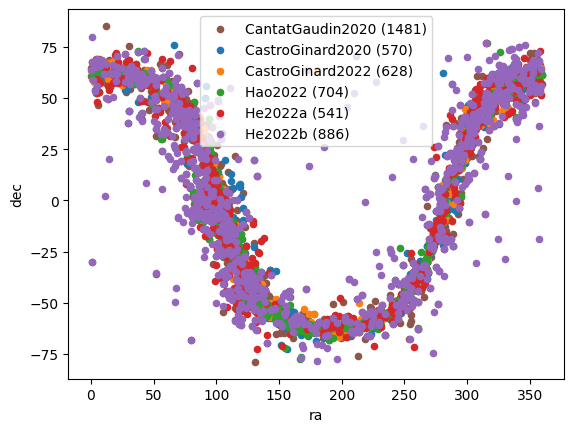

In [80]:
ax = df0.plot.scatter(x='ra',y='dec', c='C5', label=f"{cc0.catalog_name} ({len(df0)})")
_ = df1.plot.scatter(x='ra',y='dec', c='C0', label=f"{cc1.catalog_name} ({len(df1)})", ax=ax)
_ = df2.plot.scatter(x='ra',y='dec', c='C1', label=f"{cc2.catalog_name} ({len(df2)})", ax=ax)
_ = df3.plot.scatter(x='ra',y='dec', c='C2', label=f"{cc3.catalog_name} ({len(df3)})", ax=ax)
_ = df4.plot.scatter(x='ra',y='dec', c='C3', label=f"{cc4.catalog_name} ({len(df4)})", ax=ax)
_ = df5.plot.scatter(x='ra',y='dec', c='C4', label=f"{cc5.catalog_name} ({len(df5)})", ax=ax)

In [81]:
for cc in [cc0,cc1,cc2,cc3,cc4,cc5]:
#     d = cc.query_catalog()
    m = cc.query_catalog(return_members=True)
    print(d.shape, m.shape)

Using CantatGaudin2020 catalog.
(886, 17) (435833, 13)
Using CastroGinard2020 catalog.
(886, 17) (33635, 14)
Using CastroGinard2022 catalog.
(886, 17) (25466, 15)
Using Hao2022 catalog.
(886, 17) (19425, 16)
Using He2022a catalog.
(886, 17) (66468, 19)
Using He2022b catalog.
(886, 17) (134192, 17)
